# Combinando dados de varios arquivos.

In [27]:
import os
import pandas as pd

# Caminho para a pasta de downloads
caminho_pasta = "/Users/lucasdepaula/Downloads/archive-2"

# Lista para armazenar os DataFrames de cada arquivo
dataframes = []

# Percorrer os arquivos na pasta
for arquivo in os.listdir(caminho_pasta):
    
    # Verificar se o arquivo é um arquivo CSV
    if arquivo.endswith(".csv"):
        # Obter o caminho completo do arquivo
        caminho_arquivo = os.path.join(caminho_pasta, arquivo)
        # Extrair o nome do país do nome do arquivo
        pais = arquivo.split("videos")[0].strip()
        # Ler o arquivo CSV e adicionar uma coluna com o nome do país
        df = pd.read_csv(caminho_arquivo, encoding='ISO-8859-1')
        df['country'] = pais
        # Adicionar o DataFrame à lista
        dataframes.append(df)

# Concatenar todos os DataFrames em um único DataFrame
df_final = pd.concat(dataframes, ignore_index=True)

print("Arquivos combinados com sucesso")

Arquivos combinados com sucesso


# Analisando o nome das colunas / Quantidade de linhas / Lista dos paises

In [2]:
# Nome das colunas
print("Nome das colunas:")
print(df_final.columns.tolist())

# Quantidade de linhas
print("\nQuantidade de linhas:", len(df_final))

# Lista de países
paises = df_final['country'].unique()
print("\nLista de países:", paises)

Nome das colunas:
['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'country']

Quantidade de linhas: 375942

Lista de países: ['MX' 'IN' 'DE' 'JP' 'KR' 'CA' 'RU' 'FR' 'US' 'GB']


# Atualizar a coluna "publish-time" para o formato desejado: "YYYY,MM,DD"

In [3]:
# Formatar a coluna 'publish_time' para manter apenas a data (YYYY-MM-DD)
df_final['publish_time'] = pd.to_datetime(df_final['publish_time']).dt.date

# Para criar um novo arquivo CSV somente com as colunas especificadas:

In [10]:
# Criar um novo DataFrame com as colunas desejadas
df_novo = df_final[['channel_title', 'publish_time', 'views', 'likes', 'dislikes', 'country']]

# Caminho para o novo arquivo CSV
caminho_arquivo_novo = "/Users/lucasdepaula/Downloads/merged_data_subset.csv"

# Salvar o novo DataFrame em um novo arquivo CSV
df_novo.to_csv(caminho_arquivo_novo, index=False, encoding='ISO-8859-1')

print("Novo arquivo CSV salvo com sucesso em:", caminho_arquivo_novo)

Novo arquivo CSV salvo com sucesso em: /Users/lucasdepaula/Downloads/merged_data_subset.csv


In [24]:
# Nome das colunas do novo DataFrame
print("Nome das colunas do novo DataFrame:")
print(df_novo.columns.tolist())

# Mostrar as primeiras 10 linhas do arquivo
print("Primeiras 10 linhas:")
print(df_novo.head(10))

Nome das colunas do novo DataFrame:
['channel_title', 'publish_time', 'views', 'likes', 'dislikes', 'country', 'ano', 'total_likes']
Primeiras 10 linhas:
               channel_title publish_time    views  likes  dislikes country  \
0            MasterChef 2017   2017-11-13   310130   4182       361      MX   
1   Micky Contreras Martinez   2017-11-13   104972    271       174      MX   
2  El Pulso De La RepÃºblica   2017-11-13   136064  10105       266      MX   
3                   Casanare   2017-11-13    96153    378       171      MX   
4                      Musas   2017-11-13   499965  57781       681      MX   
5  MÃSICA & ENTRETENIMIENTO   2017-11-12   129645    506        67      MX   
6                La Resolana   2017-11-13    75197   2277        69      MX   
7            concienciaradio   2017-11-13   142522   7745       659      MX   
8         Los mejores Top 10   2017-11-12   371110  20155       912      MX   
9               DrossRotzank   2017-11-12  1111314  8358

# Quais os canais com mais views por pais.

Tabela dos canais com mais views por país:
      country                         channel_title       views
2422       CA                  Marvel Entertainment  1011420205
3607       CA                              T-Series   799114025
1101       CA                          Dude Perfect   729916338
4404       CA                     YouTube Spotlight   635976769
4606       CA                               ibighit   511567918
...       ...                                   ...         ...
43785      US                           CHauserable        1807
45355      US                          Total Combat        1722
44811      US  OjO Commuter Scooter by OjO Electric        1706
44190      US                         GoDucksdotcom        1391
43510      US                       90s Commercials         773

[45699 rows x 3 columns]


/var/folders/j5/4r_5v3_n4mv_kpfnl6ckn5x80000gn/T/ipykernel_76141/3628505134.py:24: UserWarning: Glyph 135 (\x87) missing from current font.
  plt.tight_layout()
/var/folders/j5/4r_5v3_n4mv_kpfnl6ckn5x80000gn/T/ipykernel_76141/3628505134.py:24: UserWarning: Glyph 157 (\x9d) missing from current font.
  plt.tight_layout()
/var/folders/j5/4r_5v3_n4mv_kpfnl6ckn5x80000gn/T/ipykernel_76141/3628505134.py:24: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.tight_layout()
/var/folders/j5/4r_5v3_n4mv_kpfnl6ckn5x80000gn/T/ipykernel_76141/3628505134.py:24: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.tight_layout()
/var/folders/j5/4r_5v3_n4mv_kpfnl6ckn5x80000gn/T/ipykernel_76141/3628505134.py:24: UserWarning: Glyph 156 (\x9c) missing from current font.
  plt.tight_layout()
/var/folders/j5/4r_5v3_n4mv_kpfnl6ckn5x80000gn/T/ipykernel_76141/3628505134.py:24: UserWarning: Glyph 138 (\x8a) missing from current font.
  plt.tight_layout()
/var/folders/j5/4r_5v3_n4mv_kpfnl6

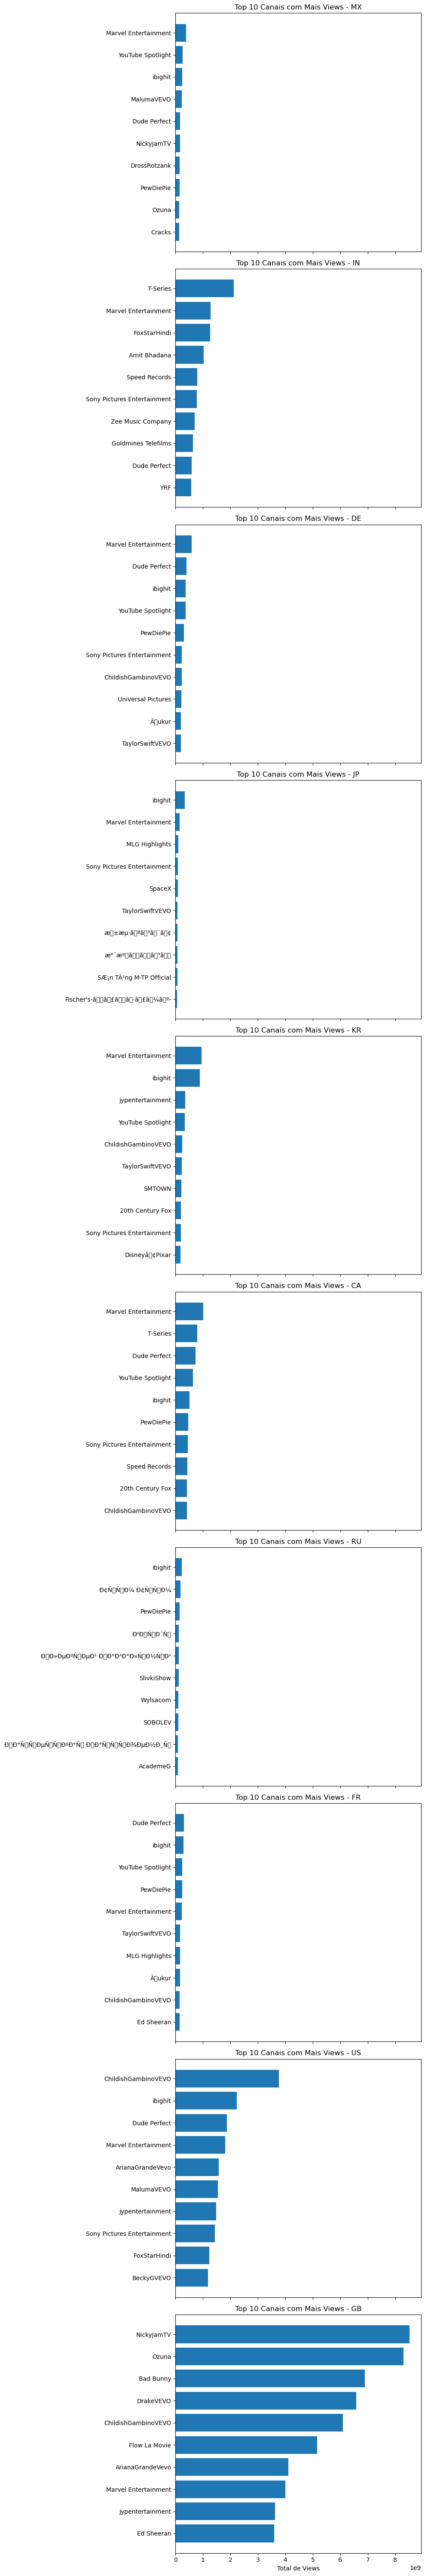

In [28]:
import matplotlib.pyplot as plt

# Ativar cópia-sobre-gravação
pd.options.mode.copy_on_write = True

# Agrupar por país e canal, somar as views e classificar em ordem decrescente
canais_mais_views_por_pais = df_novo.groupby(['country', 'channel_title'])['views'].sum().reset_index()
canais_mais_views_por_pais = canais_mais_views_por_pais.sort_values(by=['country', 'views'], ascending=[True, False])

# Mostrar tabela
print("Tabela dos canais com mais views por país:")
print(canais_mais_views_por_pais)

# Gerar gráfico de barras
fig, axes = plt.subplots(len(paises), 1, figsize=(10, 6 * len(paises)), sharex=True)

for i, pais in enumerate(paises):
    dados_pais = canais_mais_views_por_pais[canais_mais_views_por_pais['country'] == pais].head(10)
    axes[i].barh(dados_pais['channel_title'], dados_pais['views'])
    axes[i].set_title(f'Top 10 Canais com Mais Views - {pais}')
    axes[i].invert_yaxis()

plt.xlabel('Total de Views')
plt.tight_layout()
plt.show()



# Qual o ranking de canais com maior visualizacoes por ano.

Tabela do ranking de canais com mais visualizações por ano:
        ano      channel_title    views
0      2006            dannotv   258506
3      2007             revoxy  1538802
2      2007       georgegargan  1135341
1      2007            Dav hum   724958
12     2008           uhhuhhim  2430282
...     ...                ...      ...
28944  2018  NavylittleMonster      365
35798  2018   Videostendencias      302
29286  2018      No Comment TV      284
33128  2018         Sport Life      163
15930  2018  Alexander Redking      153

[45828 rows x 3 columns]


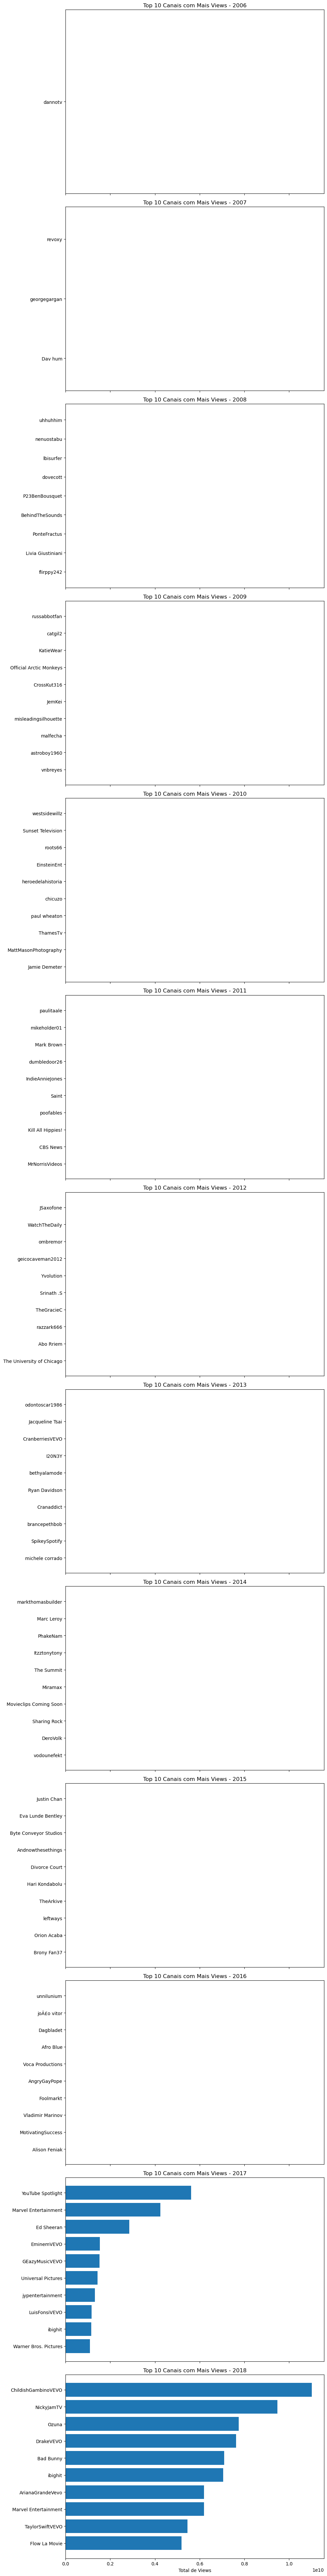

In [19]:
# Extrair o ano da coluna 'publish_time'
df_novo['ano'] = pd.to_datetime(df_novo['publish_time']).dt.year

# Agrupar por ano e canal, somar as views e classificar em ordem decrescente
ranking_canais_por_ano = df_novo.groupby(['ano', 'channel_title'])['views'].sum().reset_index()
ranking_canais_por_ano = ranking_canais_por_ano.sort_values(by=['ano', 'views'], ascending=[True, False])

# Mostrar tabela
print("Tabela do ranking de canais com mais visualizações por ano:")
print(ranking_canais_por_ano)

# Gerar gráfico de barras
fig, axes = plt.subplots(len(ranking_canais_por_ano['ano'].unique()), 1, figsize=(10, 6 * len(ranking_canais_por_ano['ano'].unique())), sharex=True)

for i, ano in enumerate(ranking_canais_por_ano['ano'].unique()):
    dados_ano = ranking_canais_por_ano[ranking_canais_por_ano['ano'] == ano].head(10)
    axes[i].barh(dados_ano['channel_title'], dados_ano['views'])
    axes[i].set_title(f'Top 10 Canais com Mais Views - {ano}')
    axes[i].invert_yaxis()

plt.xlabel('Total de Views')
plt.tight_layout()
plt.show()


# Quais os 10 canais com maior numero de curtidas. (Mostre o nome do pais de cada canal)

Tabela dos top 10 canais com mais curtidas:
              channel_title country  total_likes
35514               ibighit      GB    278862097
35519               ibighit      US    195779815
8385              DrakeVEVO      GB    144704768
5740    ChildishGambinoVEVO      GB    138849717
3443              Bad Bunny      GB    101196276
19429  Marvel Entertainment      GB     98450682
2524       ArianaGrandeVevo      GB     93591008
35786      jypentertainment      GB     91097842
5745    ChildishGambinoVEVO      US     90646384
8843             Ed Sheeran      GB     89182360


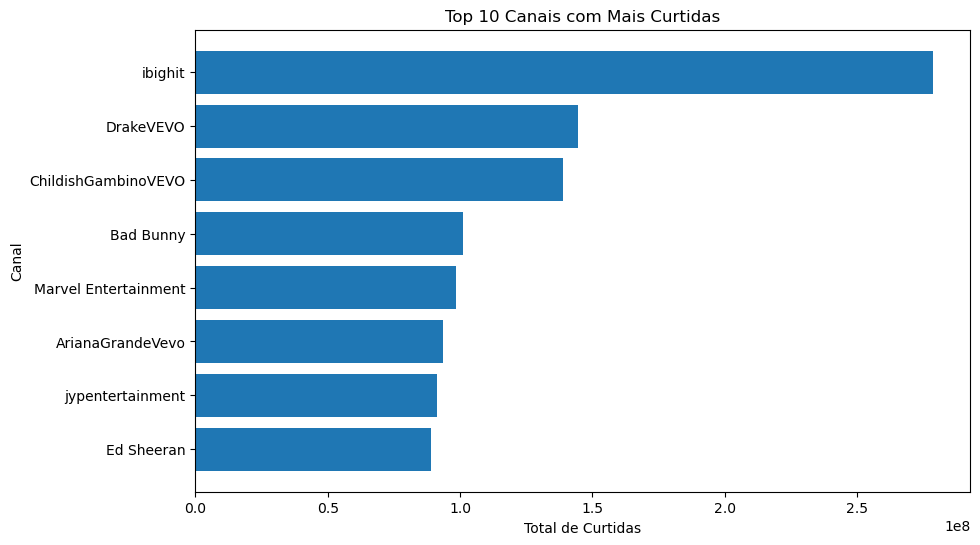

In [20]:
# Criar uma nova coluna com o total de curtidas
df_novo['total_likes'] = df_novo['likes'] - df_novo['dislikes']

# Agrupar por canal e somar as curtidas totais, classificar em ordem decrescente
top_10_canais_likes = df_novo.groupby(['channel_title', 'country'])['total_likes'].sum().reset_index()
top_10_canais_likes = top_10_canais_likes.sort_values(by='total_likes', ascending=False).head(10)

# Mostrar tabela
print("Tabela dos top 10 canais com mais curtidas:")
print(top_10_canais_likes)

# Gerar gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_canais_likes['channel_title'], top_10_canais_likes['total_likes'])
plt.xlabel('Total de Curtidas')
plt.ylabel('Canal')
plt.title('Top 10 Canais com Mais Curtidas')
plt.gca().invert_yaxis()
plt.show()
